# DSIP - Data Science and Artificial Intelligence Internship

## AUTHOR : VIDHATE SANKET DATTATRAYA

## Batch - May 2022

## Task1 - Make a Fake news detecting system based on a data set with the help of machine learning.

### Dataset Link : https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

Import these libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix,classification_report

Read csv file

In [2]:
#Read the data
df=pd.read_csv('news.csv')
#Get shape and head
df.shape
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
df.tail(7)

,Unnamed: 0,title,text,label
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [4]:
df.sample(7)

,Unnamed: 0,title,text,label
5493,9599,Saudi Arabia poised to be reelected to UN Huma...,Saudi Arabia poised to be reelected to UN Huma...,FAKE
1024,4842,His campaign’s statement that Trump accepts th...,"On Thursday night, Donald Trump finally acknow...",REAL
1545,1636,"Insiders: Rubio wins, Kasich bombs","Killing Obama administration rules, dismantlin...",REAL
4990,4531,Echoes of Charlie Hebdo in attack on Texas Muh...,Texas police killed two gunmen on Sunday after...,REAL
1985,2795,Obama's Iran deal is now near certain to survi...,As Congress's vote on a resolution to disappro...,REAL
739,4494,"Supreme Court: your right to a ""speedy trial"" ...",The Supreme Court unanimously decided that onc...,REAL
6200,2561,Cruz's immigration gambit,"During the campaign, Trump had threatened to i...",REAL


In [5]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
len(df)

6335

In [8]:
df.shape

(6335, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [10]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

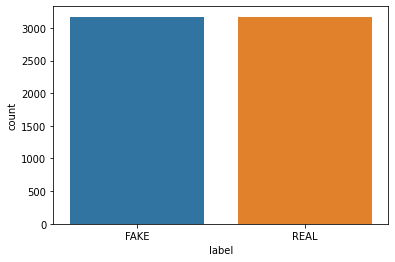

In [20]:
sns.countplot(data=df,x="label")

In [12]:
title1=df['title']
title1

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [21]:
#Fake News Detection - Get the labels
labels=df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [22]:
#Fake News Detection - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [23]:
#Fake News Detection  - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fake News Detection  - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

Visualization of the dataset

In [24]:
text1=df['text']
text1

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

Spliting the data into training and testing

Evaluation

1. Passive Aggressive Classifier

In [25]:
#Fake News Detection - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%


In [26]:
#Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[591,  47],
       [ 42, 587]], dtype=int64)

Plotting confusion matrix for Passive Aggressive Classifier

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       633
        REAL       0.93      0.93      0.93       634

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


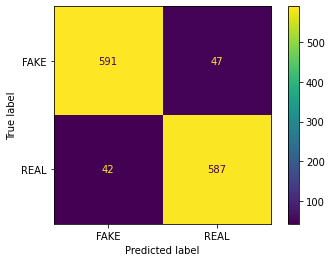

In [27]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(pac,tfidf_test,y_test)

2. Multinomial naive bayes

In [28]:
#Fake News Detection - Initialize a MultinomialNB(naive_bayes)
NB= MultinomialNB()
NB.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=NB.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 84.06%


In [29]:
#Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[450, 188],
       [ 14, 615]], dtype=int64)

Plotting confusion matrix for Multinomial naive bayes

              precision    recall  f1-score   support

        FAKE       0.71      0.97      0.82       464
        REAL       0.98      0.77      0.86       803

    accuracy                           0.84      1267
   macro avg       0.84      0.87      0.84      1267
weighted avg       0.88      0.84      0.84      1267



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


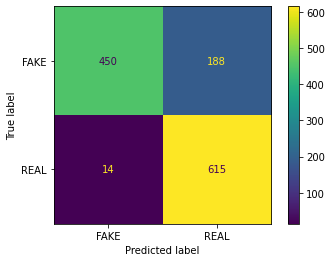

In [30]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(NB,tfidf_test,y_test)

3. Logistic Regression

In [31]:
#Fake News Detection - Initialize a Logistic Regression
LG= LogisticRegression(max_iter=1000)
LG.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=LG.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.71%


In [32]:
#Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[600,  38],
       [ 67, 562]], dtype=int64)

Plotting confusion matrix for Logistic Regression

              precision    recall  f1-score   support

        FAKE       0.94      0.90      0.92       667
        REAL       0.89      0.94      0.91       600

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


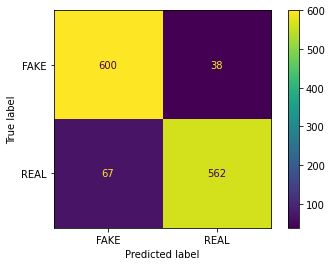

In [33]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(LG,tfidf_test,y_test)

4. Linear SVC

In [34]:
#Fake News Detection - Initialize a Linear SVC
L_SVC= LinearSVC()
L_SVC.fit(tfidf_train,y_train)
#Fake News Detection - Predict on the test set and calculate accuracy
y_pred=L_SVC.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.21%


In [35]:
#Fake News Detection- Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[603,  35],
       [ 51, 578]], dtype=int64)

Plotting confusion matrix for Linear SVC

              precision    recall  f1-score   support

        FAKE       0.95      0.92      0.93       654
        REAL       0.92      0.94      0.93       613

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


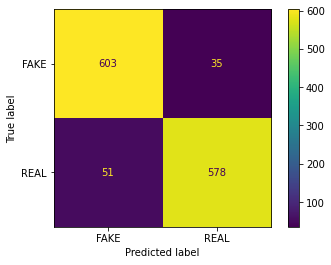

In [36]:
print(classification_report(y_pred,y_test))
plot_confusion_matrix(L_SVC,tfidf_test,y_test)

In [37]:
df = df['title'][0]
df

'You Can Smell Hillary’s Fear'

In [38]:
df = re.sub('[^a-zA-Z]', ' ' , df)

In [39]:
#change into lower case

df = df.lower()
df

'you can smell hillary s fear'

In [40]:
#split the text

list=df.split()
list

['you', 'can', 'smell', 'hillary', 's', 'fear']

Predicting the Real/Fake news

In [41]:

pipe=Pipeline([('tfidf',TfidfVectorizer()),('Linear SVC',LinearSVC())])

In [42]:
pipe.fit(text1,labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('Linear SVC', LinearSVC())])

In [43]:
Pred_News1=['Daniel Greenfield, a Shillman Journalism Fello...']
print(pipe.predict(Pred_News1))

['FAKE']


In [44]:
Pred_News2=[' Its primary day in New York and front-runners...']
print(pipe.predict(Pred_News2))

['REAL']
